In [1]:
# meta-data does not work yet in VScode
# https://github.com/microsoft/vscode-jupyter/issues/1121

{
    "tags": [
        "hide-cell"
    ]
}


### Install necessary libraries

try:
    import jax
except:
    # For cuda version, see https://github.com/google/jax#installation
    %pip install --upgrade "jax[cpu]" 
    import jax

try:
    import distrax
except:
    %pip install --upgrade  distrax
    import distrax

try:
    import jsl
except:
    %pip install git+https://github.com/probml/jsl
    import jsl

try:
    import rich
except:
    %pip install rich
    import rich




     |████████████████████████████████| 272 kB 6.9 MB/s eta 0:00:01
  Using cached tensorflow_probability-0.16.0-py2.py3-none-any.whl (6.3 MB)
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.13.0
    Uninstalling tensorflow-probability-0.13.0:
      Successfully uninstalled tensorflow-probability-0.13.0
  Attempting uninstall: distrax
    Found existing installation: distrax 0.0.1
    Uninstalling distrax-0.0.1:
      Successfully uninstalled distrax-0.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jsl 0.0.0 requires dataclasses, which is not installed.
You should consider upgrading via the '/opt/anaconda3/envs/spyder-dev/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
{
    "tags": [
        "hide-cell"
    ]
}


### Import standard libraries

import abc
from dataclasses import dataclass
import functools
import itertools

from typing import Any, Callable, NamedTuple, Optional, Union, Tuple

import matplotlib.pyplot as plt
import numpy as np


import jax
import jax.numpy as jnp
from jax import lax, vmap, jit, grad
from jax.scipy.special import logit
from jax.nn import softmax
from functools import partial
from jax.random import PRNGKey, split

import inspect
import inspect as py_inspect
import rich
from rich import inspect as r_inspect
from rich import print as r_print

def print_source(fname):
    r_print(py_inspect.getsource(fname))

```{math}

\newcommand\floor[1]{\lfloor#1\rfloor}

\newcommand{\real}{\mathbb{R}}

% Numbers
\newcommand{\vzero}{\boldsymbol{0}}
\newcommand{\vone}{\boldsymbol{1}}

% Greek https://www.latex-tutorial.com/symbols/greek-alphabet/
\newcommand{\valpha}{\boldsymbol{\alpha}}
\newcommand{\vbeta}{\boldsymbol{\beta}}
\newcommand{\vchi}{\boldsymbol{\chi}}
\newcommand{\vdelta}{\boldsymbol{\delta}}
\newcommand{\vDelta}{\boldsymbol{\Delta}}
\newcommand{\vepsilon}{\boldsymbol{\epsilon}}
\newcommand{\vzeta}{\boldsymbol{\zeta}}
\newcommand{\vXi}{\boldsymbol{\Xi}}
\newcommand{\vell}{\boldsymbol{\ell}}
\newcommand{\veta}{\boldsymbol{\eta}}
%\newcommand{\vEta}{\boldsymbol{\Eta}}
\newcommand{\vgamma}{\boldsymbol{\gamma}}
\newcommand{\vGamma}{\boldsymbol{\Gamma}}
\newcommand{\vmu}{\boldsymbol{\mu}}
\newcommand{\vmut}{\boldsymbol{\tilde{\mu}}}
\newcommand{\vnu}{\boldsymbol{\nu}}
\newcommand{\vkappa}{\boldsymbol{\kappa}}
\newcommand{\vlambda}{\boldsymbol{\lambda}}
\newcommand{\vLambda}{\boldsymbol{\Lambda}}
\newcommand{\vLambdaBar}{\overline{\vLambda}}
%\newcommand{\vnu}{\boldsymbol{\nu}}
\newcommand{\vomega}{\boldsymbol{\omega}}
\newcommand{\vOmega}{\boldsymbol{\Omega}}
\newcommand{\vphi}{\boldsymbol{\phi}}
\newcommand{\vvarphi}{\boldsymbol{\varphi}}
\newcommand{\vPhi}{\boldsymbol{\Phi}}
\newcommand{\vpi}{\boldsymbol{\pi}}
\newcommand{\vPi}{\boldsymbol{\Pi}}
\newcommand{\vpsi}{\boldsymbol{\psi}}
\newcommand{\vPsi}{\boldsymbol{\Psi}}
\newcommand{\vrho}{\boldsymbol{\rho}}
\newcommand{\vtheta}{\boldsymbol{\theta}}
\newcommand{\vthetat}{\boldsymbol{\tilde{\theta}}}
\newcommand{\vTheta}{\boldsymbol{\Theta}}
\newcommand{\vsigma}{\boldsymbol{\sigma}}
\newcommand{\vSigma}{\boldsymbol{\Sigma}}
\newcommand{\vSigmat}{\boldsymbol{\tilde{\Sigma}}}
\newcommand{\vsigmoid}{\vsigma}
\newcommand{\vtau}{\boldsymbol{\tau}}
\newcommand{\vxi}{\boldsymbol{\xi}}


% Lower Roman (Vectors)
\newcommand{\va}{\mathbf{a}}
\newcommand{\vb}{\mathbf{b}}
\newcommand{\vBt}{\mathbf{\tilde{B}}}
\newcommand{\vc}{\mathbf{c}}
\newcommand{\vct}{\mathbf{\tilde{c}}}
\newcommand{\vd}{\mathbf{d}}
\newcommand{\ve}{\mathbf{e}}
\newcommand{\vf}{\mathbf{f}}
\newcommand{\vg}{\mathbf{g}}
\newcommand{\vh}{\mathbf{h}}
%\newcommand{\myvh}{\mathbf{h}}
\newcommand{\vi}{\mathbf{i}}
\newcommand{\vj}{\mathbf{j}}
\newcommand{\vk}{\mathbf{k}}
\newcommand{\vl}{\mathbf{l}}
\newcommand{\vm}{\mathbf{m}}
\newcommand{\vn}{\mathbf{n}}
\newcommand{\vo}{\mathbf{o}}
\newcommand{\vp}{\mathbf{p}}
\newcommand{\vq}{\mathbf{q}}
\newcommand{\vr}{\mathbf{r}}
\newcommand{\vs}{\mathbf{s}}
\newcommand{\vt}{\mathbf{t}}
\newcommand{\vu}{\mathbf{u}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\vw}{\mathbf{w}}
\newcommand{\vws}{\vw_s}
\newcommand{\vwt}{\mathbf{\tilde{w}}}
\newcommand{\vWt}{\mathbf{\tilde{W}}}
\newcommand{\vwh}{\hat{\vw}}
\newcommand{\vx}{\mathbf{x}}
%\newcommand{\vx}{\mathbf{x}}
\newcommand{\vxt}{\mathbf{\tilde{x}}}
\newcommand{\vy}{\mathbf{y}}
\newcommand{\vyt}{\mathbf{\tilde{y}}}
\newcommand{\vz}{\mathbf{z}}
%\newcommand{\vzt}{\mathbf{\tilde{z}}}


% Upper Roman (Matrices)
\newcommand{\vA}{\mathbf{A}}
\newcommand{\vB}{\mathbf{B}}
\newcommand{\vC}{\mathbf{C}}
\newcommand{\vD}{\mathbf{D}}
\newcommand{\vE}{\mathbf{E}}
\newcommand{\vF}{\mathbf{F}}
\newcommand{\vG}{\mathbf{G}}
\newcommand{\vH}{\mathbf{H}}
\newcommand{\vI}{\mathbf{I}}
\newcommand{\vJ}{\mathbf{J}}
\newcommand{\vK}{\mathbf{K}}
\newcommand{\vL}{\mathbf{L}}
\newcommand{\vM}{\mathbf{M}}
\newcommand{\vMt}{\mathbf{\tilde{M}}}
\newcommand{\vN}{\mathbf{N}}
\newcommand{\vO}{\mathbf{O}}
\newcommand{\vP}{\mathbf{P}}
\newcommand{\vQ}{\mathbf{Q}}
\newcommand{\vR}{\mathbf{R}}
\newcommand{\vS}{\mathbf{S}}
\newcommand{\vT}{\mathbf{T}}
\newcommand{\vU}{\mathbf{U}}
\newcommand{\vV}{\mathbf{V}}
\newcommand{\vW}{\mathbf{W}}
\newcommand{\vX}{\mathbf{X}}
%\newcommand{\vXs}{\vX_{\vs}}
\newcommand{\vXs}{\vX_{s}}
\newcommand{\vXt}{\mathbf{\tilde{X}}}
\newcommand{\vY}{\mathbf{Y}}
\newcommand{\vZ}{\mathbf{Z}}
\newcommand{\vZt}{\mathbf{\tilde{Z}}}
\newcommand{\vzt}{\mathbf{\tilde{z}}}


%%%%
\newcommand{\hidden}{\vz}
\newcommand{\hid}{\hidden}
\newcommand{\observed}{\vy}
\newcommand{\obs}{\observed}
\newcommand{\inputs}{\vu}
\newcommand{\input}{\inputs}

\newcommand{\hmmTrans}{\vA}
\newcommand{\hmmObs}{\vB}
\newcommand{\hmmInit}{\vpi}
\newcommand{\hmmhid}{\hidden}
\newcommand{\hmmobs}{\obs}

\newcommand{\ldsDyn}{\vA}
\newcommand{\ldsObs}{\vC}
\newcommand{\ldsDynIn}{\vB}
\newcommand{\ldsObsIn}{\vD}
\newcommand{\ldsDynNoise}{\vQ}
\newcommand{\ldsObsNoise}{\vR}

\newcommand{\ssmDyn}{f}
\newcommand{\ssmObs}{h}
```


(sec:ssm-intro)=
# What are State Space Models?


A state space model or SSM
is a partially observed Markov model,
in which the hidden state,  $\hidden_t$,
evolves over time according to a Markov process,
possibly conditional on external inputs or controls $\input_t$,
and each hidden state generates some
observations $\obs_t$ at each time step.
(In this book, we mostly focus on discrete time systems,
although  we consider the continuous-time case in  XXX.)
We get to see the observations, but not the hidden state.
Our main goal is to infer the hidden state given the observations.
However, we can also use the model to predict future observations,
by first predicting future hidden states, and then predicting
what observations they might generate.
By using  a hidden state $\hidden_t$
to represent the past observations, $\obs_{1:t-1}$,
the  model can have ``infinite'' memory,
unlike a standard Markov model.

Formally we can define an SSM 
as the following joint distribution:
```{math}
:label: SSMfull
p(\hmmobs_{1:T},\hmmhid_{1:T}|\inputs_{1:T})
 = \left[ p(\hmmhid_1|\inputs_1) \prod_{t=2}^{T}
 p(\hmmhid_t|\hmmhid_{t-1},\inputs_t) \right]
 \left[ \prod_{t=1}^T p(\hmmobs_t|\hmmhid_t, \inputs_t, \hmmobs_{t-1}) \right]
```
where $p(\hmmhid_t|\hmmhid_{t-1},\inputs_t)$ is the
transition model,
$p(\hmmobs_t|\hmmhid_t, \inputs_t, \hmmobs_{t-1})$ is the
observation model,
and $\inputs_{t}$ is an optional input or action.
See {numref}`Figure %s <ssm-ar>` 
for an illustration of the corresponding graphical model.


```{figure} /figures/SSM-AR-inputs.png
:scale: 100%
:name: ssm-ar

Illustration of an SSM as a graphical model.
```

We often consider a simpler setting in which there
are no external inputs,
and the observations are conditionally independent of each other
(rather than having Markovian dependencies) given the hidden state.
In this case the joint simplifies to 
```{math}
:label: SSMsimplified
p(\hmmobs_{1:T},\hmmhid_{1:T})
 = \left[ p(\hmmhid_1) \prod_{t=2}^{T}
 p(\hmmhid_t|\hmmhid_{t-1}) \right]
 \left[ \prod_{t=1}^T p(\hmmobs_t|\hmmhid_t \right]
```
See {numref}`Figure %s <ssm-simplified>` 
for an illustration of the corresponding graphical model.
Compare {eq}`SSMfull` and {eq}`SSMsimplified`.


```{figure} /figures/SSM-simplified.png
:scale: 100%
:name: ssm-simplified

Illustration of a simplified SSM.
```



(sec:hmm-intro)=
# Hidden Markov Models

In this section, we discuss the
hidden Markov model or HMM,
which is a state space model in which the hidden states
are discrete, so $\hmmhid_t \in \{1,\ldots, K\}$.
The observations may be discrete,
$\hmmobs_t \in \{1,\ldots, C\}$,
or continuous,
$\hmmobs_t \in \real^D$,
or some combination,
as we illustrate below.
More details can be found in e.g., 
{cite}`Rabiner89,Fraser08,Cappe05`.
For an interactive introduction,
see https://nipunbatra.github.io/hmm/.

(sec:casino)=
### Example: Casino HMM

To illustrate HMMs with categorical observation model,
we consider the "Ocassionally dishonest casino" model from {cite}`Durbin98`.
There are 2 hidden states, representing whether the dice being used in the casino is fair or loaded.
Each state defines a distribution over the 6 possible observations.

The transition model is denoted by
```{math}
p(z_t=j|z_{t-1}=i) = \hmmTrans_{ij}
```
Here the $i$'th row of $\vA$ corresponds to the outgoing distribution from state $i$.
This is  a row stochastic matrix,
meaning each row sums to one.
We can visualize
the non-zero entries in the transition matrix by creating a state transition diagram,
as shown in 
{numref}`Figure %s <casino-fig>`
%{ref}`casino-fig`.

```{figure} /figures/casino.png
:scale: 50%
:name: casino-fig

Illustration of the casino HMM.
```

The  observation model
$p(\obs_t|\hidden_t=j)$ has the form
```{math}
p(\obs_t=k|\hidden_t=j) = \hmmObs_{jk} 
```
This is represented by the histograms associated with each
state in {ref}`casino-fig`.

Finally,
the initial state distribution is denoted by
```{math}
p(z_1=j) = \hmmInit_j
```

Collectively we denote all the parameters by $\vtheta=(\hmmTrans, \hmmObs, \hmmInit)$.

Now let us implement this model in code.

In [3]:
# state transition matrix
A = np.array([
    [0.95, 0.05],
    [0.10, 0.90]
])

# observation matrix
B = np.array([
    [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], # fair die
    [1/10, 1/10, 1/10, 1/10, 1/10, 5/10] # loaded die
])

pi = np.array([0.5, 0.5])

(nstates, nobs) = np.shape(B)


In [4]:
import distrax
from distrax import HMM


hmm = HMM(trans_dist=distrax.Categorical(probs=A),
            init_dist=distrax.Categorical(probs=pi),
            obs_dist=distrax.Categorical(probs=B))

print(hmm)


Let's sample from the model. We will generate a sequence of latent states, $\hid_{1:T}$,
which we then convert to a sequence of observations, $\obs_{1:T}$.

In [5]:



seed = 314
n_samples = 300
z_hist, x_hist = hmm.sample(seed=PRNGKey(seed), seq_len=n_samples)

z_hist_str = "".join((np.array(z_hist) + 1).astype(str))[:60]
x_hist_str = "".join((np.array(x_hist) + 1).astype(str))[:60]

print("Printing sample observed/latent...")
print(f"x: {x_hist_str}")
print(f"z: {z_hist_str}")

Printing sample observed/latent...
x: 633665342652353616444236412331351246651613325161656366246242
z: 222222211111111111111111111111111111111222111111112222211111


In [7]:
# Here is the source code for the sampling algorithm.

print_source(hmm.sample)


def sample(self,
             *,
             seed: chex.PRNGKey,
             seq_len: chex.Array) -> Tuple:
    """Sample from this HMM.

    Samples an observation of given length according to this
    Hidden Markov Model and gives the sequence of the hidden states
    as well as the observation.

    Args:
      seed: Random key of shape (2,) and dtype uint32.
      seq_len: The length of the observation sequence.

    Returns:
      Tuple of hidden state sequence, and observation sequence.
    """
    rng_key, rng_init = jax.random.split(seed)
    initial_state = self._init_dist.sample(seed=rng_init)

    def draw_state(prev_state, key):
      state = self._trans_dist.sample(seed=key)
      return state, state

    rng_state, rng_obs = jax.random.split(rng_key)
    keys = jax.random.split(rng_state, seq_len - 1)
    _, states = jax.lax.scan(draw_state, initial_state, keys)
    states = jnp.append(initial_state, states)

    def draw_obs(state, key):
      return self._obs_dist.sample(seed=key)

    keys = jax.random.split(rng_obs, seq_len)
    obs_seq = jax.vmap(draw_obs, in_axes=(0, 0))(states, keys)

    return states, obs_seq

Our primary goal will be to infer the latent state from the observations,
so we can detect if the casino is being dishonest or not. This will
affect how we choose to gamble our money.
We discuss various ways to perform this inference below.

# Linear Gaussian SSMs

Blah blah

(sec:tracking-lds)=
## Example: model for 2d tracking

Blah blah

(sec:inference)=
# Inferential goals

```{figure} /figures/dbn-inference-problems.png
:scale: 100%
:name: dbn-inference

Illustration of the different kinds of inference in an SSM.
 The main kinds of inference for state-space models.
    The shaded region is the interval for which we have data.
    The arrow represents the time step at which we want to perform inference.
    $t$ is the current time,  $T$ is the sequence length,
$\ell$ is the lag and $h$ is the prediction horizon.
```



Given the sequence of observations, and a known model,
one of the main tasks with SSMs
to perform posterior inference,
about the hidden states; this is also called
state estimation.
At each time step $t$,
there are multiple forms of posterior we may be interested in computing,
including the following:
- the filtering distribution
$p(\hmmhid_t|\hmmobs_{1:t})$
- the smoothing distribution
$p(\hmmhid_t|\hmmobs_{1:T})$ (note that this conditions on future data $T>t$)
- the fixed-lag smoothing distribution
$p(\hmmhid_{t-\ell}|\hmmobs_{1:t})$ (note that this
infers $\ell$ steps in the past given data up to the present).

We may also want to compute the
predictive distribution $h$ steps into the future:
\begin{align}
p(\hmmobs_{t+h}|\hmmobs_{1:t})
&= \sum_{\hmmhid_{t+h}} p(\hmmobs_{t+h}|\hmmhid_{t+h}) p(\hmmhid_{t+h}|\hmmobs_{1:t})
\end{align}
where the hidden state predictive distribution is
\begin{align}
p(\hmmhid_{t+h}|\hmmobs_{1:t})
&= \sum_{\hmmhid_{t:t+h-1}}
 p(\hmmhid_t|\hmmobs_{1:t}) 
 p(\hmmhid_{t+1}|\hmmhid_{t})
 p(\hmmhid_{t+2}|\hmmhid_{t+1})
\cdots
 p(\hmmhid_{t+h}|\hmmhid_{t+h-1})
\end{align}
See \cref{fig:dbn_inf_problems} for a summary of these distributions.

In addition  to comuting posterior marginals,
we may want to compute the most probable hidden sequence,
i.e., the joint MAP estimate
```{math}
\arg \max_{\hmmhid_{1:T}} p(\hmmhid_{1:T}|\hmmobs_{1:T})
```
or sample sequences from the posterior
```{math}
\hmmhid_{1:T} \sim p(\hmmhid_{1:T}|\hmmobs_{1:T})
```

Algorithms for all these task are discussed in the following chapters,
since the details depend on the form of the SSM.






## Example: inference in the casino HMM

We now illustrate filtering, smoothing and MAP decoding applied
to the casino HMM from {ref}`sec:casino`. 


In [13]:
# Call inference engine

filtered_dist, _, smoothed_dist, loglik = hmm.forward_backward(x_hist)
map_path = hmm.viterbi(x_hist)

/opt/anaconda3/envs/spyder-dev/lib/python3.9/site-packages/jax/_src/numpy/lax_numpy.py:5256: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "astype")


In [9]:
# Find the span of timesteps that the    simulated systems turns to be in state 1
def find_dishonest_intervals(z_hist):
    spans = []
    x_init = 0
    for t, _ in enumerate(z_hist[:-1]):
        if z_hist[t + 1] == 0 and z_hist[t] == 1:
            x_end = t
            spans.append((x_init, x_end))
        elif z_hist[t + 1] == 1 and z_hist[t] == 0:
            x_init = t + 1
    return spans

In [10]:
# Plot posterior
def plot_inference(inference_values, z_hist, ax, state=1, map_estimate=False):
    n_samples = len(inference_values)
    xspan = np.arange(1, n_samples + 1)
    spans = find_dishonest_intervals(z_hist)
    if map_estimate:
        ax.step(xspan, inference_values, where="post")
    else:
        ax.plot(xspan, inference_values[:, state])

    for span in spans:
        ax.axvspan(*span, alpha=0.5, facecolor="tab:gray", edgecolor="none")
    ax.set_xlim(1, n_samples)
    # ax.set_ylim(0, 1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlabel("Observation number")

Text(0.5, 1.0, 'Filtered')

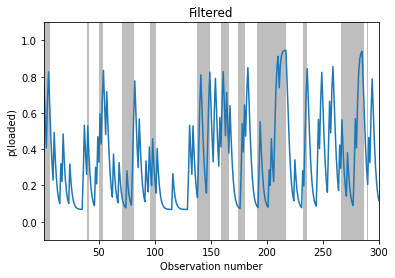

In [14]:
 # Filtering
fig, ax = plt.subplots()
plot_inference(filtered_dist, z_hist, ax)
ax.set_ylabel("p(loaded)")
ax.set_title("Filtered")
 

  

Text(0.5, 1.0, 'Smoothed')

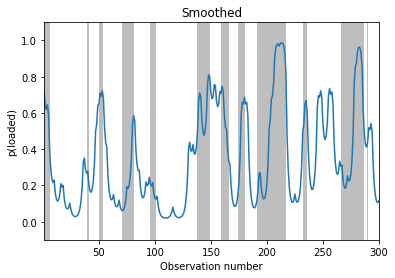

In [12]:
# Smoothing
fig, ax = plt.subplots()
plot_inference(smoothed_dist, z_hist, ax)
ax.set_ylabel("p(loaded)")
ax.set_title("Smoothed")


 

In [ ]:
# MAP estimation
fig, ax = plt.subplots()
plot_inference(map_path, z_hist, ax, map_estimate=True)
ax.set_ylabel("MAP state")
ax.set_title("Viterbi")


In [ ]:
# TODO: posterior samples


## Example: inference in the tracking SSM

We now illustrate filtering, smoothing and MAP decoding applied
to the 2d tracking HMM from {ref}`sec:tracking-lds`. 